In [1]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos

In [2]:
#realizando a leitura do arquivo (dataset)
dataframe_envio_portos = pd.read_csv("data.csv")

In [3]:
#apresentando as 5 primeiras linhas do dataset
dataframe_envio_portos.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


In [4]:
dataframe_envio_portos.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      120 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


**Existem Colunas Com Valores Nulos?**

In [5]:
dataframe_envio_portos.shape

(120, 14)

**Quantas Instâncias e Características Existem no Dataset?**



In [6]:
#analisando a "estatística" do dataset
dataframe_envio_portos.describe()

,importer_id,exporter_id,declared_quantity,declared_cost,declared_weight,actual_weight,days_in_transit
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,111.0,222.0,127.458333,6743.649881,1264.702934,1306.429806,35.424705
std,0.0,0.0,14.641311,2991.797050,633.149971,656.911704,26.571591
min,111.0,222.0,100.000000,1441.012419,18.459509,19.275241,12.410325
25%,111.0,222.0,115.750000,4442.903914,820.314400,841.763738,18.225625
50%,111.0,222.0,131.500000,6010.218745,1255.597743,1305.716419,27.044293
75%,111.0,222.0,139.000000,8887.095370,1711.314045,1763.681083,44.356374
max,111.0,222.0,149.000000,14281.325362,2806.338955,2918.681683,147.787560


**Qual é o Valor Médio Para os Pesos Declarados?**

<AxesSubplot:>

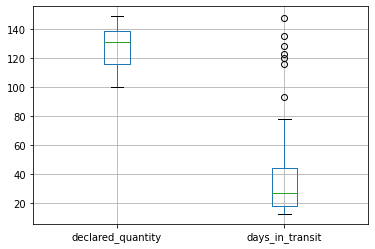

In [7]:
#identificando possíveis outliers
dataframe_envio_portos[['declared_quantity','days_in_transit']].boxplot()

**Existem Possíveis Outliers?**

In [8]:
#realizando a análise de regressão
x = dataframe_envio_portos['declared_weight'].values  #variável independente 
Y = dataframe_envio_portos['actual_weight'].values #variável dependente 

In [9]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [10]:
#Realiza a construção do modelo de regressão
reg = LinearRegression()
x_Reshaped = x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao = reg.fit (x_Reshaped,Y) # encontra os coeficientes (realiza a regressão)

In [11]:
#realiza a previsão
previsao = reg.predict(x_Reshaped)

In [12]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [13]:
#parâmetros encontrados
print('Y = {} \nX = {}'.format(reg.coef_, reg.intercept_))

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = [1.03718115] 
X = -5.296233030439225
Coeficiente de Determinação (R2): 0.9993288165644932


**Pelo Coefiente de Determinação, o Que É Possível Afirmar Sobre a Relação Entre as Variáveis Peso Real x Peso Declarado?**

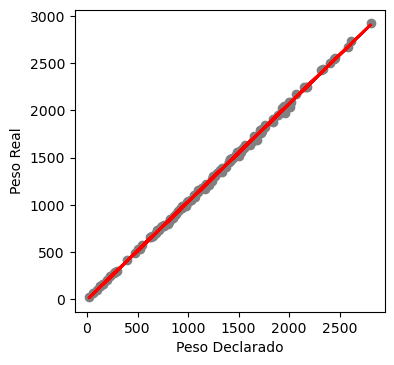

In [14]:
#realiza o plot dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, Y,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x, previsao, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.show()

#### Pergunta 1
Qual é a biblioteca em Python utilizada para criação de dataframes?
- Seaborn 
- ***Pandas*** 
- Numpy 
- Matplotlib 

#### Pergunta 2
A função head (pandas.head( )) mostra quantas linhas no modo "padrão" (default)?
- 10 
- 3 
- ***5*** 
- 15 

#### Pergunta 3
Para o dataset presente no trabalho prático, quantas linhas existem?
 - 33 
 - 14 
 - 100 
 - ***120*** 

#### Pergunta 4
Para o dataset utilizado no trabalho prático, quantas colunas estão presentes?
- 18 
- 13 
- 20 
- ***14*** 

#### Pergunta 5
Após a execução da função pd.info() para o dataset presente no trabalho prático, quantos tipos diferentes de variáveis foram mostrados?
- 8 
- 5 
- 6 
- ***4*** 

#### Pergunta 6
Para o dataset presente no trabalho prático, quantas colunas são do tipo inteiro (int64)?
- 1 
- ***3*** 
- 0 
- 4 

#### Pergunta 7
Qual é o valor médio para a varíavel "declared_quantity" presente no dataset?
- 14.67 
- ***127.45*** 
- 34.42 
- 1306.42 

#### Pergunta 8
Qual é o valor do desvio padrão para a variável "declared_weight" presente no dataset do trabalho prático?
- ***633.14*** 
- 128,47 
- 13.04 
- 1005.36 

#### Pergunta 9
Analisando o boxplot das variáveis 'declared_quantity' e 'days_in_transit' é possível afirmar:
- ***Para a variável "days_in_transit" existem possíveis outliers.*** 
- Possuem a mesma mediana. 
- Não existem evidências de outliers. 
- Ambas são valores inteiros. 

#### Pergunta 10
Qual das variáveis abaixo é do tipo booleana?
- declared_quantity 
- importer_id 
- item 
- ***valid_import***

#### Pergunta 11
Para a análise de regressão empregada no trabalho prático, qual é a variável preditora?
- days_in_transit 
- exporter_id 
- actual_weight 
- ***declared_weight***

#### Pergunta 12
Qual foi a métrica utilizada para avaliar o modelo de regressão do trabalho prático?
- Poisson 
- ***Coeficiente de determinação*** 
- Erro absoluto 
- Erro médio quadrático 

#### Pergunta 13
Para a reta de regressão encontrada no trabalho, qual é o coeficiente angular da reta?
- ***1.03*** 
- -5.8 
- 3.04 
- 5.8 

#### Pergunta 14
Para a reta de regressão encontrada no trabalho, qual é o coeficiente linear da reta?
- -5.8 
- 8.7 
- ***-5.29*** 
- 1.03 

#### Pergunta 15
Sobre o coeficiente de determinação encontrado para a reta do trabalho prático, é correto afirmar:
- Apresenta valor negativo 
- Nada pode ser dito, pois apresenta um valor próximo a zero. 
- Não pode ser calculado. 
- ***Possui um valor muito próximo de 1, indicando que ocorreu um bom "fit" para os dados*** 